In [6]:
# for d in os.listdir("./train"):
#     for (dirpath, dirnames, filenames) in os.walk(os.path.join('./train', d)):
#         for f in filenames[:15]:
#             os.remove(os.path.join('./train', d,f))
            
# for d in os.listdir("./test"):
#     for (dirpath, dirnames, filenames) in os.walk(os.path.join('./test', d)):
#         for f in filenames[15:]:
#             print(os.path.join('./test', d,f))
#             os.remove(os.path.join('./test', d,f))
        


In [1]:
!python -V

Python 3.8.10


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,Conv2D,MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.python.compiler.mlcompute import mlcompute
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()
mlcompute.set_mlc_device(device_name='gpu')
tf.config.run_functions_eagerly(False)
print(tf.executing_eagerly())

False


In [3]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

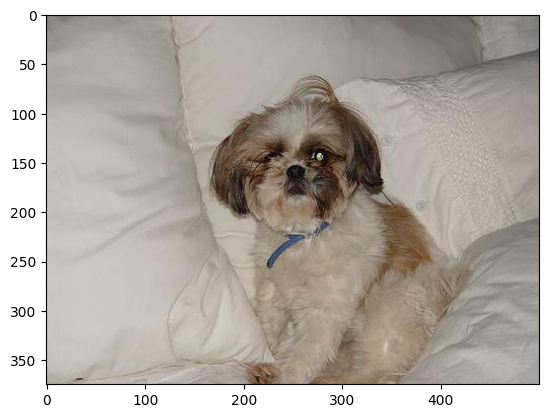

In [4]:
img = mpimg.imread("./train/n02086240-Shih-Tzu/n02086240_9.jpg")
plt.imshow(img)
plt.show()

In [6]:
TRAINING_DIR = "./train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "./test/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(50,50),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(50,50),
	class_mode='categorical',
  batch_size=126
)

Found 18780 images belonging to 120 classes.
Found 1800 images belonging to 120 classes.


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(50, 50,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(120, activation='softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3872)              0         
_________________________________________________________________
dropout (Dropout)            (None, 3872)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

In [12]:
history = model.fit(train_generator, epochs=1000, steps_per_epoch=20,validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/1000
20/20 [==============================] - 7s 353ms/step - batch: 9.5000 - size: 126.0000 - loss: 3.8608 - accuracy: 0.1234 - val_loss: 4.3957 - val_accuracy: 0.0714
Epoch 2/1000
20/20 [==============================] - 6s 328ms/step - batch: 9.5000 - size: 126.0000 - loss: 3.8988 - accuracy: 0.1202 - val_loss: 4.2242 - val_accuracy: 0.0873
Epoch 3/1000
20/20 [==============================] - 6s 320ms/step - batch: 9.5000 - size: 126.0000 - loss: 3.8961 - accuracy: 0.1091 - val_loss: 4.0898 - val_accuracy: 0.0952
Epoch 4/1000
20/20 [==============================] - 6s 316ms/step - batch: 9.5000 - size: 126.0000 - loss: 3.8839 - accuracy: 0.1238 - val_loss: 4.1388 - val_accuracy: 0.0847
Epoch 5/1000
20/20 [==============================] - 6s 301ms/step - batch: 9.5000 - size: 120.0000 - loss: 3.9426 - accuracy: 0.1013 - val_loss: 4.0266 - val_accuracy: 0.0926
Epoch 6/1000
20/20 [==============================] - 6s 321ms/step - batch: 9.5000 - size: 126.0000 - loss: 3.8646

KeyboardInterrupt: 

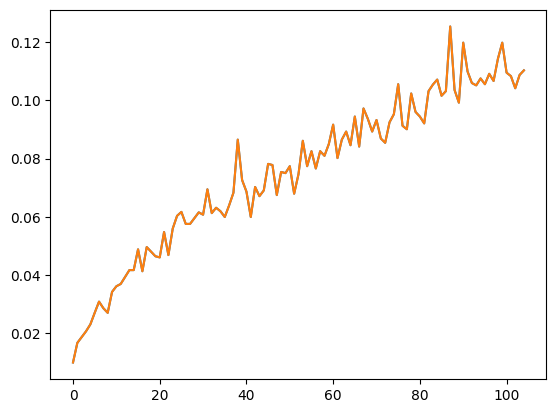

In [11]:
plt.plot(history.history['accuracy']) 
plt.show()

In [ ]:
plt.plot(history.history[])

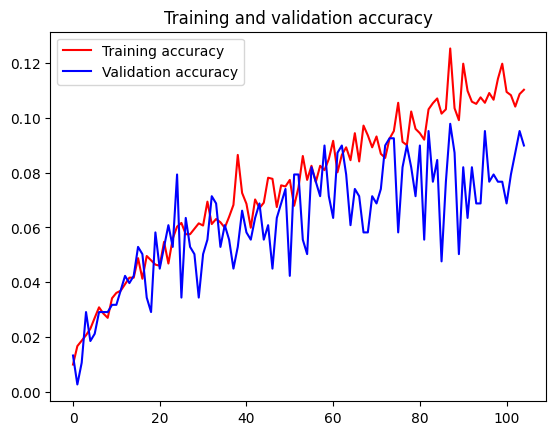

<Figure size 640x480 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [15]:
model_2 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(50, 50,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(120, activation='softmax')
])

model_2.compile(loss = 'categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [ ]:
history2 = model_2.fit(train_generator, epochs=105, steps_per_epoch=20, verbose = 1)

In [13]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      